In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [6]:
from vega_datasets import data
df = data.sf_temps()

Use the above dataset for the exercises below:

1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [8]:
df.head()

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00


In [9]:
df.date = pd.to_datetime(df.date, format = '%Y-%m-%d %I-%p')
df.head()

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00


In [11]:
df = df.set_index('date').sort_index()
df.head()

,temp
date,
2010-01-01 00:00:00,47.80
2010-01-01 01:00:00,47.40
2010-01-01 02:00:00,46.90
2010-01-01 03:00:00,46.50
2010-01-01 04:00:00,46.00


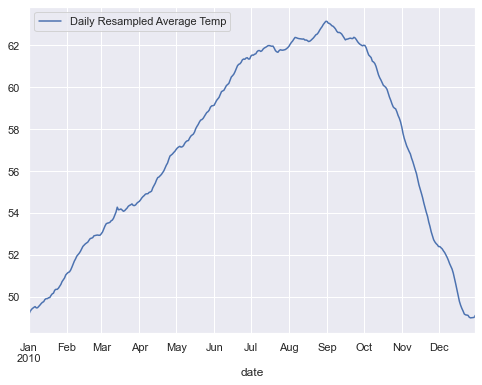

In [20]:
# df.temp.plot(label='raw data')
df.resample('D').mean().temp.plot(label='Daily Resampled Average Temp')
plt.legend()
plt.show()

2. Write the code necessary to visualize the minimum temperature over time.

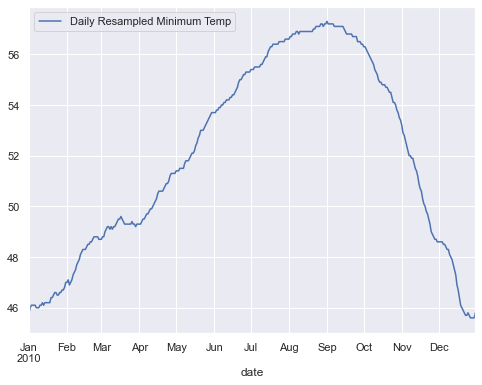

In [18]:
# df.temp.plot(label='raw data')
df.resample('D').min().temp.plot(label='Daily Resampled Minimum Temp')
plt.legend()
plt.show()

3. Write the code necessary to visualize the maximum temperature over time.

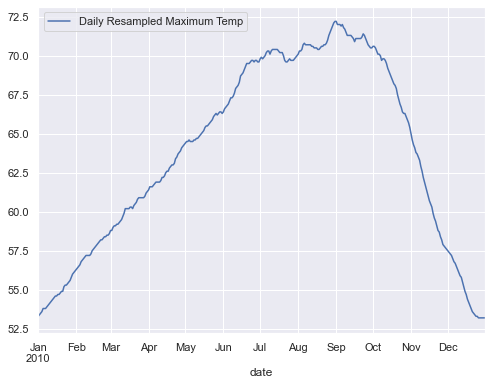

In [21]:
# df.temp.plot(label='raw data')
df.resample('D').max().temp.plot(label='Daily Resampled Maximum Temp')
plt.legend()
plt.show()

4. Which month is the coldest, on average?

In [29]:
df.resample('M').mean().sort_values('temp')

,temp
date,
2010-01-31,49.98
2010-12-31,50.50
2010-02-28,52.24
2010-03-31,53.96
2010-11-30,55.19
2010-04-30,55.63
2010-05-31,57.97
2010-10-31,60.25
2010-06-30,60.44


5. Which month has the highest average temperature?

In [30]:
df.resample('M').mean().sort_values('temp', ascending=False)

,temp
date,
2010-09-30,62.49
2010-08-31,62.41
2010-07-31,61.77
2010-06-30,60.44
2010-10-31,60.25
2010-05-31,57.97
2010-04-30,55.63
2010-11-30,55.19
2010-03-31,53.96


6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [44]:
df_daily = df.resample('D').agg(['min', 'max'])
df_daily.head()
# df_diff['diff(1)'] = df_diff.temp.diff(1)

temp      
             min   max
date                  
2010-01-01 45.80 53.30
2010-01-02 46.00 53.40
2010-01-03 46.10 53.50
2010-01-04 46.10 53.60
2010-01-05 46.10 53.80

In [47]:
df_daily['diff'] = df_daily.temp['max'] - df_daily.temp['min']
df_daily.head()

temp       diff
             min   max     
date                       
2010-01-01 45.80 53.30 7.50
2010-01-02 46.00 53.40 7.40
2010-01-03 46.10 53.50 7.40
2010-01-04 46.10 53.60 7.50
2010-01-05 46.10 53.80 7.70

In [52]:
df_daily.resample('M').mean().sort_values('diff', ascending=False)

temp        diff
             min   max      
date                        
2010-09-30 56.90 71.31 14.40
2010-07-31 56.05 70.02 13.98
2010-06-30 54.48 68.43 13.95
2010-08-31 56.94 70.81 13.87
2010-10-31 54.93 68.36 13.43
2010-05-31 52.40 65.31 12.91
2010-04-30 50.33 62.65 12.32
2010-03-31 49.24 60.09 10.85
2010-11-30 50.78 61.01 10.24
2010-02-28 48.06 57.55  9.49
2010-01-31 46.31 54.65  8.34
2010-12-31 47.03 54.95  7.93

7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

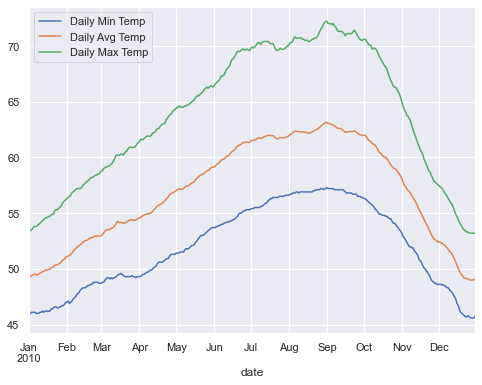

In [53]:
df.resample('D').min().temp.plot(label = 'Daily Min Temp')
df.resample('D').mean().temp.plot(label = 'Daily Avg Temp')
df.resample('D').max().temp.plot(label = 'Daily Max Temp')
plt.legend()
plt.show()

In [54]:
from vega_datasets import data
df = data.seattle_weather()

Use the dataset to answer the following questions:

- Which year and month combination has the highest amount of precipitation?

In [55]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.00,12.80,5.00,4.70,drizzle
1,2012-01-02,10.90,10.60,2.80,4.50,rain
2,2012-01-03,0.80,11.70,7.20,2.30,rain
3,2012-01-04,20.30,12.20,5.60,4.70,rain
4,2012-01-05,1.30,8.90,2.80,6.10,rain
